In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [4]:
siim_path = '/kaggle/input/siim-isic-melanoma-classification'
tr_img_path = '/kaggle/input/siim-isic-melanoma-classification/jpeg/train/'
te_img_path = '/kaggle/input/siim-isic-melanoma-classification/jpeg/test/'

In [5]:
train = pd.read_csv(os.path.join(siim_path,'train.csv'))
test = pd.read_csv(os.path.join(siim_path,'test.csv'))

# Check NULL Data and Columns

In [6]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----

In [7]:
train.isnull().sum().sort_values(ascending=False)

anatom_site_general_challenge    527
age_approx                        68
sex                               65
target                             0
benign_malignant                   0
diagnosis                          0
patient_id                         0
image_name                         0
dtype: int64

In [8]:
test.isnull().sum().sort_values(ascending=False)

anatom_site_general_challenge    351
age_approx                         0
sex                                0
patient_id                         0
image_name                         0
dtype: int64

# Features Distribution And Imputing NULL Data

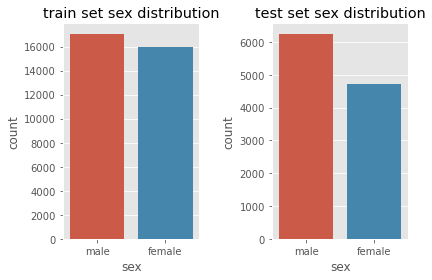

In [9]:
plt.style.use('ggplot')
fig,ax = plt.subplots(1,2)
sns.countplot(train.sex,ax=ax[0])
ax[0].set_title('train set sex distribution')
ax[1].set_title('test set sex distribution')
sns.countplot(test.sex,ax=ax[1])
plt.tight_layout()

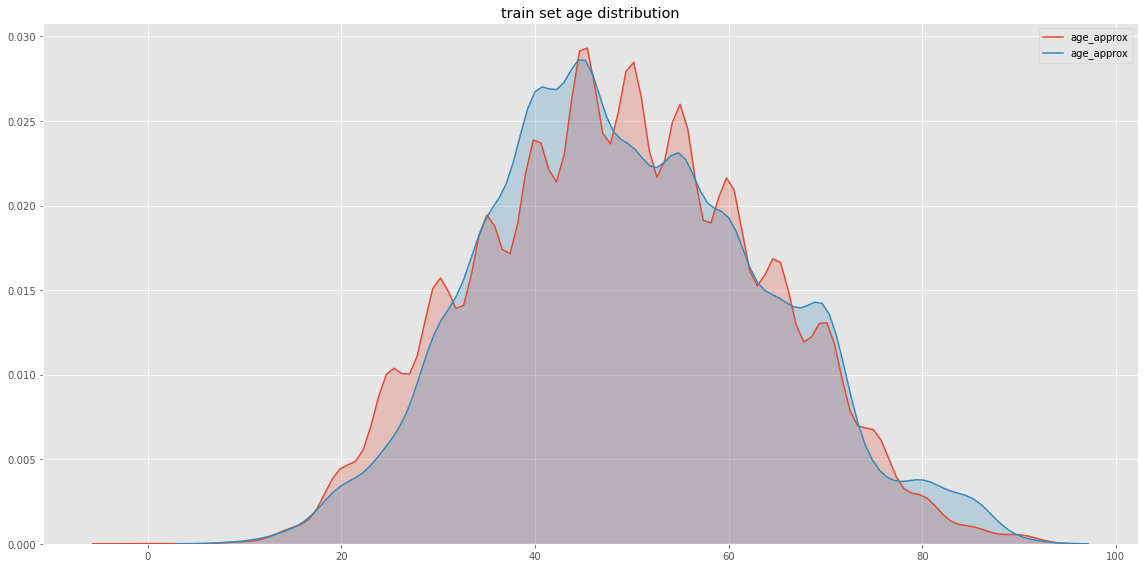

In [10]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
sns.kdeplot(train['age_approx'],ax=ax,shade=True)
ax.set_title('train set age distribution')
sns.kdeplot(test['age_approx'],ax=ax,shade=True)
plt.tight_layout()

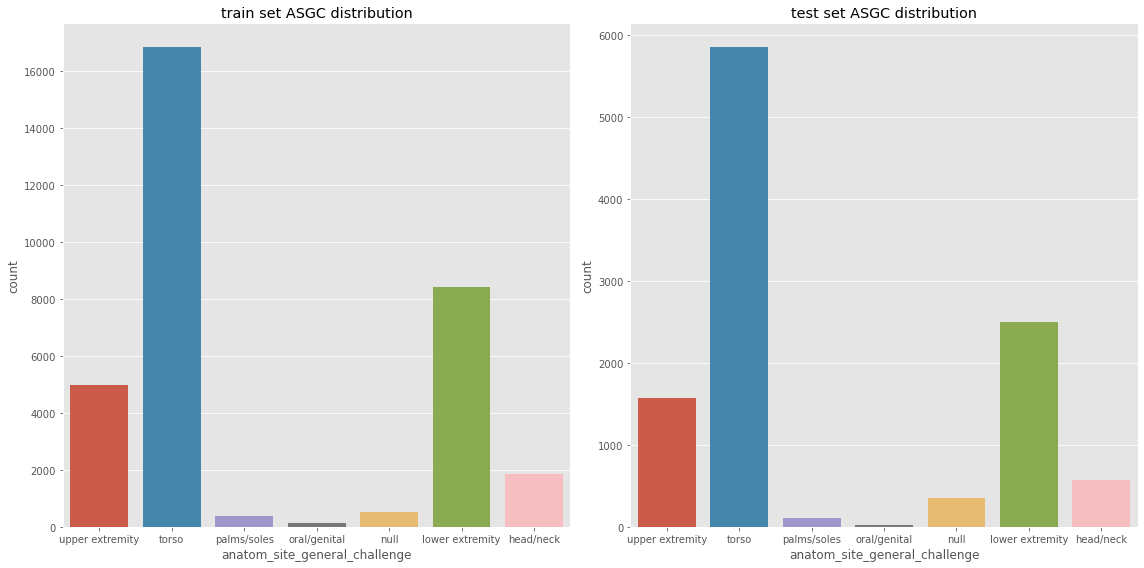

In [11]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
train['anatom_site_general_challenge'].fillna('null',inplace=True)
test['anatom_site_general_challenge'].fillna('null',inplace=True)
sns.countplot(train['anatom_site_general_challenge'].sort_values(ascending=False),ax=ax[0])
ax[0].set_title('train set ASGC distribution')
ax[1].set_title('test set ASGC distribution')
sns.countplot(test['anatom_site_general_challenge'].sort_values(ascending=False),ax=ax[1])
plt.tight_layout()

In [12]:
train.rename(columns={'anatom_site_general_challenge':'anatom'},inplace=True)
test.rename(columns={'anatom_site_general_challenge':'anatom'},inplace=True)

In [13]:
train['sex'].fillna(train['sex'].value_counts().sort_values(ascending=False).index[0],inplace=True)
train['age_approx'].fillna((train['age_approx'].mean()+train['age_approx'].median())/2,inplace=True)

In [14]:
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


# Correlation between Features

In [15]:
print('malignant ratio:',np.round(train[train['target']== 1].shape[0]/train.shape[0]*100,2),'%')
print('benign sex ratio (man/all):',np.round(train[(train['target']== 0) & (train['sex']=='male')].shape[0]/
                                  train[train['target']== 0].shape[0]*100,2),'%')
print('malignant sex ratio (man/all):',np.round(train[(train['target']== 1) & (train['sex']=='male')].shape[0]/
                                  train[train['target']== 1].shape[0]*100,2),'%')

malignant ratio: 1.76 %
benign sex ratio (man/all): 51.57 %
malignant sex ratio (man/all): 62.33 %


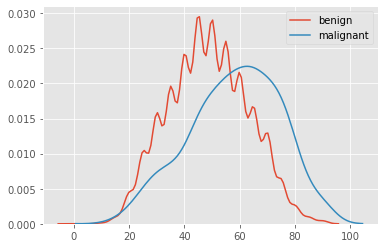

In [16]:
sns.kdeplot(train[train['target']==0]['age_approx'],label='benign')
sns.kdeplot(train[train['target']==1]['age_approx'],label='malignant')

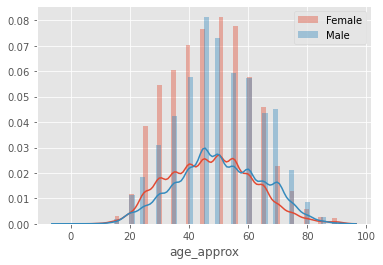

In [17]:
sns.distplot(train[train.sex == 'female']['age_approx'],label='Female')
sns.distplot(train[train.sex == 'male']['age_approx'],label='Male')
plt.legend()

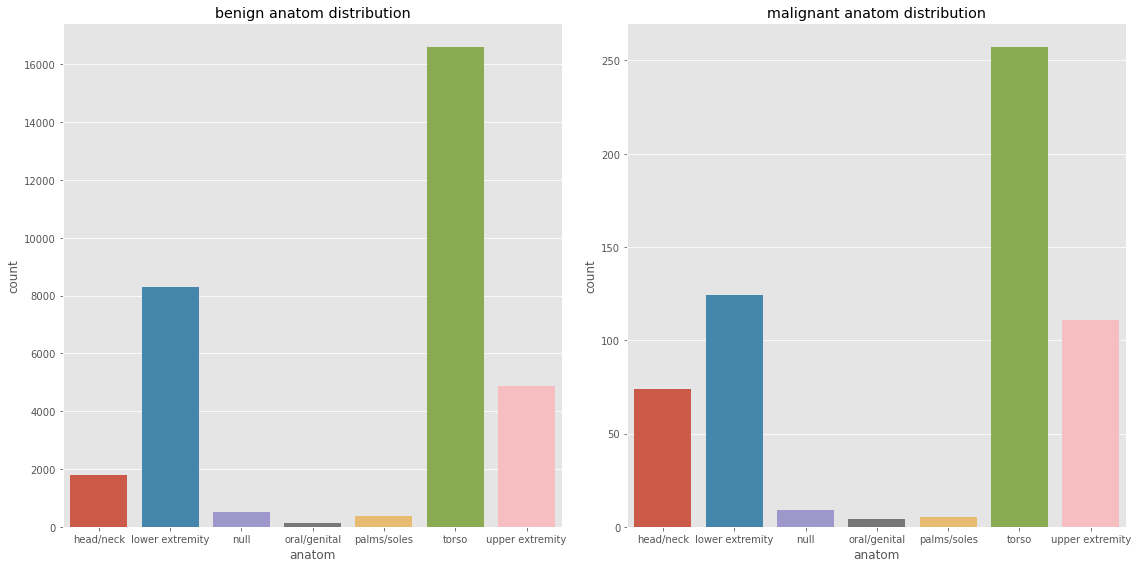

In [18]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
sns.countplot(train[train['target']==0]['anatom'].sort_values(),ax=ax[0])
ax[0].set_title('benign anatom distribution')
ax[1].set_title('malignant anatom distribution')
sns.countplot(train[train['target']==1]['anatom'].sort_values(),ax=ax[1])
plt.tight_layout()

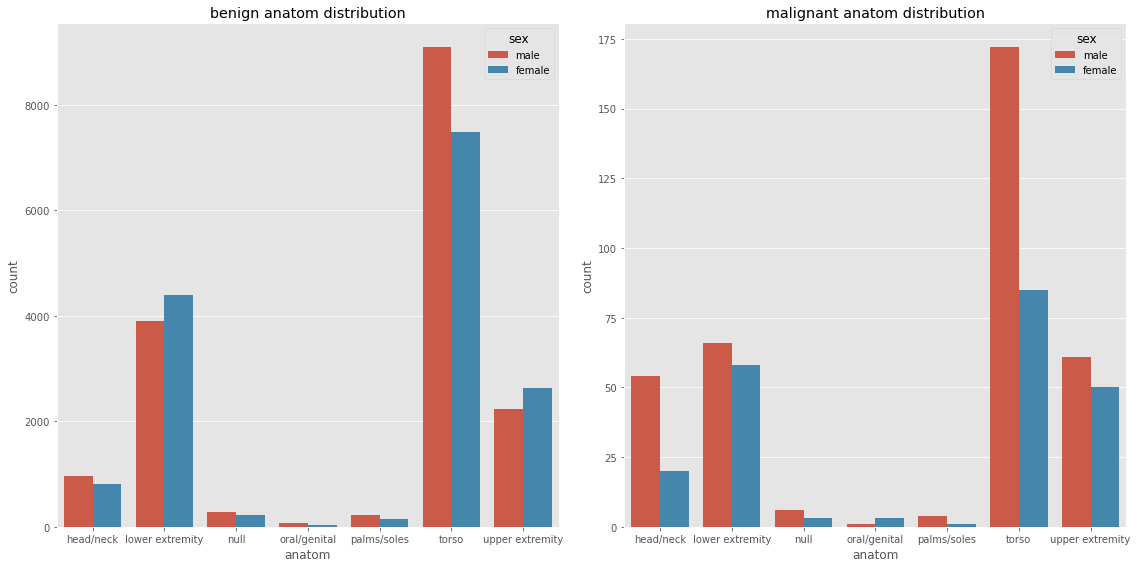

In [19]:
fig,ax = plt.subplots(1,2,figsize=(16,8))
sns.countplot(train[train['target']==0]['anatom'].sort_values(),ax=ax[0],hue='sex',data=train)
ax[0].set_title('benign anatom distribution')
ax[1].set_title('malignant anatom distribution')
sns.countplot(train[train['target']==1]['anatom'].sort_values(),ax=ax[1],hue='sex',data=train)
plt.tight_layout()

# #Images and Patient_ID

In [20]:
print(train['patient_id'].nunique())
print(train['patient_id'].count())
print('train set mean #images per person: {:.1f}'.format(train['patient_id'].count()/train['patient_id'].nunique()))
print(test['patient_id'].nunique())
print(test['patient_id'].count())
print('test setmean #images per person: {:.1f}'.format(test['patient_id'].count()/test['patient_id'].nunique()))

2056
33126
train set mean #images per person: 16.1
690
10982
test setmean #images per person: 15.9


In [21]:
train['age_min'] = train['patient_id'].map(train.groupby(['patient_id'])['age_approx'].min())
train['age_max'] = train['patient_id'].map(train.groupby(['patient_id'])['age_approx'].max())

test['age_min'] = test['patient_id'].map(test.groupby(['patient_id'])['age_approx'].min())
test['age_max'] = test['patient_id'].map(test.groupby(['patient_id'])['age_approx'].max())

In [22]:
train.rename(columns={'patient_id':'id'},inplace=True)
test.rename(columns={'patient_id':'id'},inplace=True)

In [23]:
train['n_images'] = train.id.map(train.groupby(['id']).image_name.count())
test['n_images'] = test.id.map(test.groupby(['id']).image_name.count())

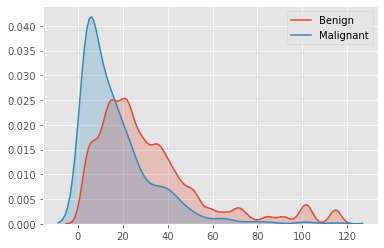

In [24]:
sns.kdeplot(train[train['target'] == 0]['n_images'],shade=True,label='Benign')
sns.kdeplot(train[train['target'] == 1]['n_images'],shade=True,label='Malignant')
plt.legend()

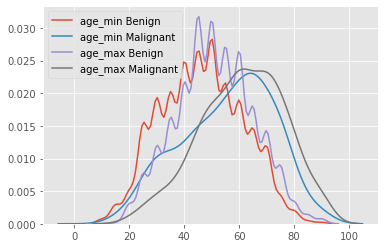

In [25]:
sns.kdeplot(train[train['target'] == 0]['age_min'],label='age_min Benign')
sns.kdeplot(train[train['target'] == 1]['age_min'],label='age_min Malignant')
sns.kdeplot(train[train['target'] == 0]['age_max'],label='age_max Benign')
sns.kdeplot(train[train['target'] == 1]['age_max'],label='age_max Malignant')
plt.legend()

In [26]:
train.groupby('age_min')['target'].mean()

age_min
0.000000     0.000000
10.000000    0.000000
15.000000    0.009029
20.000000    0.010753
25.000000    0.009244
30.000000    0.012576
35.000000    0.010378
40.000000    0.008214
45.000000    0.012884
49.435008    0.000000
50.000000    0.009595
55.000000    0.019339
60.000000    0.020675
65.000000    0.036123
70.000000    0.028939
75.000000    0.088365
80.000000    0.070122
85.000000    0.109589
90.000000    0.200000
Name: target, dtype: float64

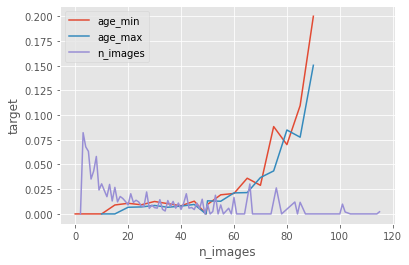

In [27]:
sns.lineplot(x=train.groupby('age_min')['target'].mean().index,y=train.groupby('age_min')['target'].mean(),label='age_min')
sns.lineplot(x=train.groupby('age_max')['target'].mean().index,y=train.groupby('age_max')['target'].mean(),label='age_max')
sns.lineplot(x=train.groupby('n_images')['target'].mean().index,y=train.groupby('n_images')['target'].mean(),label='n_images')

# Image MetaData

In [28]:
for data, location in zip([train, test], [tr_img_path, te_img_path]):
    images = data['image_name'].values
    sizes = np.zeros(images.shape[0])
    for i, path in enumerate(images):
        sizes[i] = os.path.getsize(os.path.join(location, f'{path}.jpg'))

    data['image_size'] = sizes

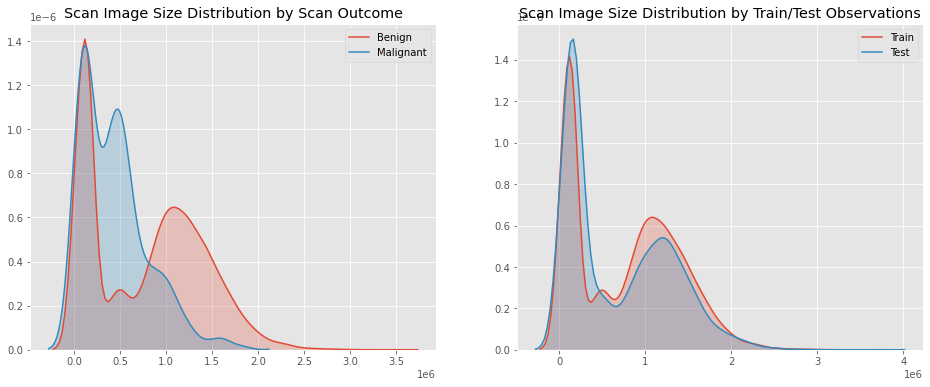

In [29]:
# Plotting image sizes:

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.kdeplot(train[train['target'] == 0]['image_size'],shade=True,ax=ax[0],label='Benign')
sns.kdeplot(train[train['target'] == 1]['image_size'],shade=True,ax=ax[0],label='Malignant')
sns.kdeplot(train.image_size,label='Train',shade=True,ax=ax[1])
sns.kdeplot(test.image_size,label='Test',shade=True,ax=ax[1])
ax[0].set_title('Scan Image Size Distribution by Scan Outcome')
ax[1].set_title('Scan Image Size Distribution by Train/Test Observations')
plt.show()

In [30]:
# from keras.preprocessing import image
# from tqdm import tqdm
# for data, location in zip([train, test],[tr_img_path, te_img_path]):
#    images = data['image_name'].values
#    reds = np.zeros(images.shape[0])
#    greens = np.zeros(images.shape[0])
#    blues = np.zeros(images.shape[0])
#    mean = np.zeros(images.shape[0])
#    x = np.zeros(images.shape[0], dtype=int)
#    y = np.zeros(images.shape[0], dtype=int)
#    for i, path in enumerate(tqdm(images)):
#        img = np.array(image.load_img(os.path.join(location, f'{path}.jpg')))

#        reds[i] = np.mean(img[:,:,0].ravel())
#        greens[i] = np.mean(img[:,:,1].ravel())
#        blues[i] = np.mean(img[:,:,2].ravel())
#        mean[i] = np.mean(img)
#        x[i] = img.shape[1]
#        y[i] = img.shape[0]

#    data['reds'] = reds
#    data['greens'] = greens
#    data['blues'] = blues
#    data['mean_colors'] = mean
#    data['width'] = x
#    data['height'] = y

# train['total_pixels']= train['width']*train['height']
# test['total_pixels']= test['width']*test['height']
# train['res'] = train['width'].astype(str) + 'x' + train['height'].astype(str)
# test['res'] = test['width'].astype(str) + 'x' + test['height'].astype(str)

In [31]:
img_stats_path = f'/kaggle/input/melanoma2020imgtabular'
train_attr = pd.read_csv(os.path.join(img_stats_path, 'train_mean_colorres.csv'))
test_attr = pd.read_csv(os.path.join(img_stats_path, 'test_mean_colorres.csv'))

In [32]:
train = pd.concat([train, train_attr], axis=1)
test = pd.concat([test, test_attr], axis=1)

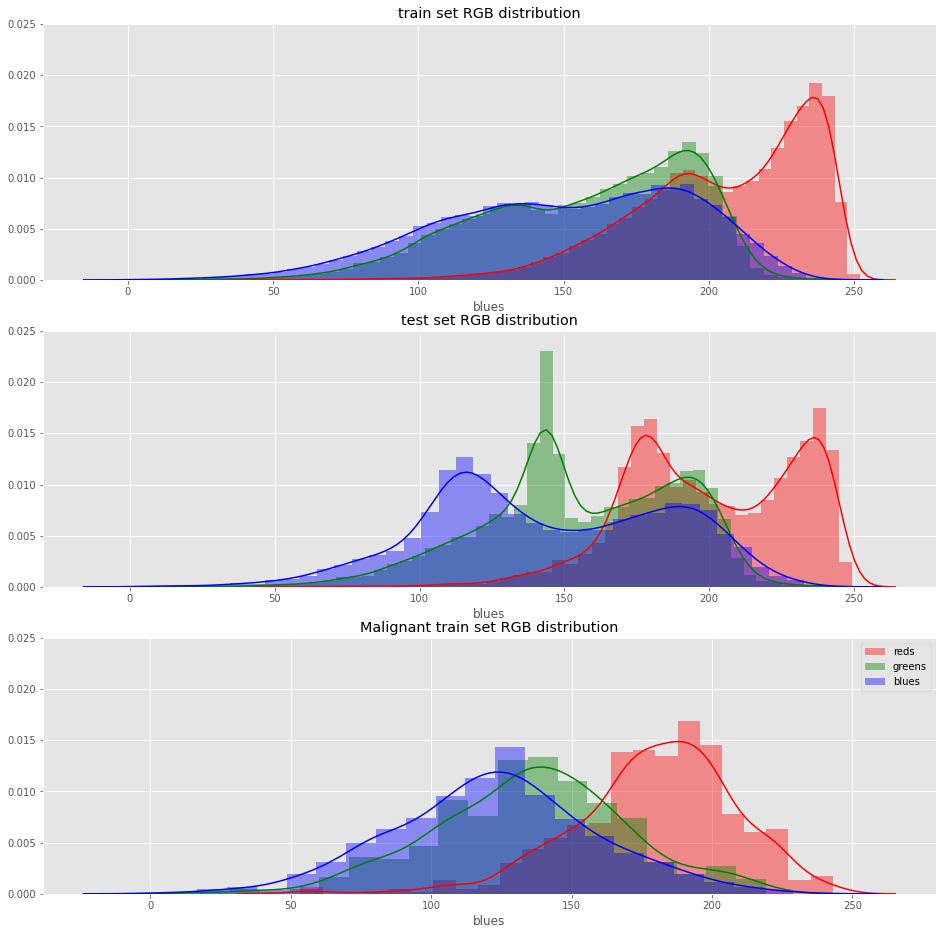

In [33]:
fig,ax = plt.subplots(3,1,figsize=(16,16))
sns.distplot(train['reds'],ax=ax[0],label='reds',color='red')
sns.distplot(train['greens'],ax=ax[0],label='green',color='green')
sns.distplot(train['blues'],ax=ax[0],label='blue',color='blue')
ax[0].set_title("train set RGB distribution")
ax[1].set_title("test set RGB distribution")
ax[2].set_title("Malignant train set RGB distribution")
sns.distplot(train[train['target']==1]['reds'],ax=ax[2],label='reds',color='red')
sns.distplot(train[train['target']==1]['greens'],ax=ax[2],label='greens',color='green')
sns.distplot(train[train['target']==1]['blues'],ax=ax[2],label='blues',color='blue')
sns.distplot(test['reds'],ax=ax[1],label='reds',color='red')
sns.distplot(test['greens'],ax=ax[1],label='green',color='green')
sns.distplot(test['blues'],ax=ax[1],label='blue',color='blue')
for i in range(3):
    ax[i].set_ylim(0,0.025)
plt.legend()
plt.show()

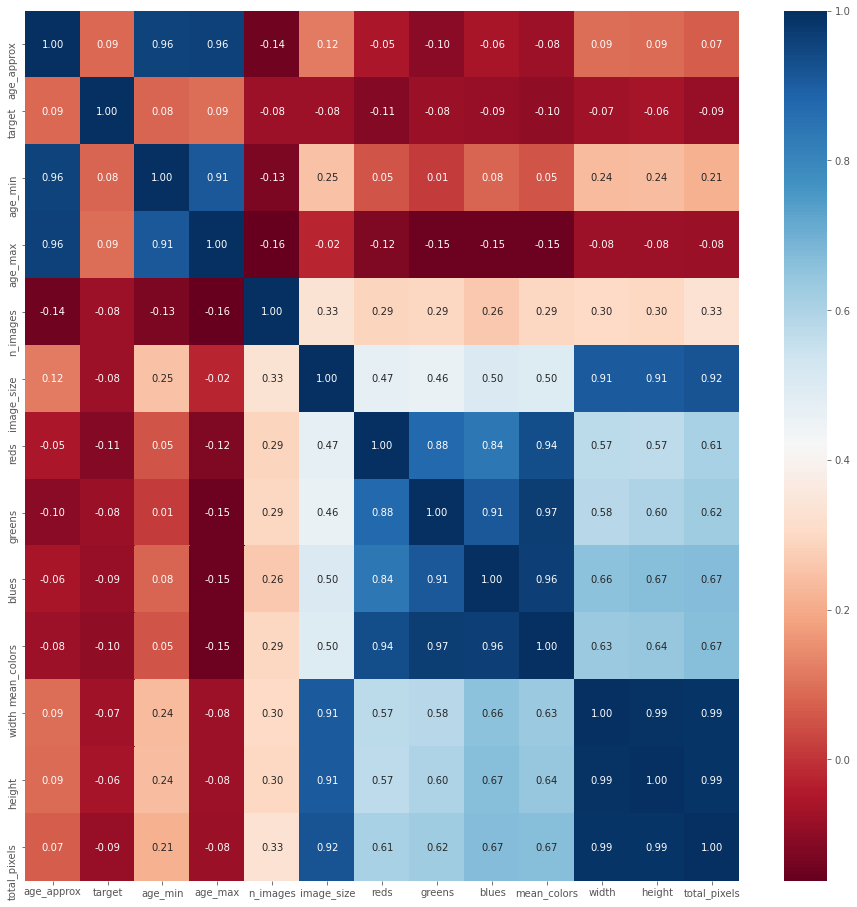

In [34]:
plt.figure(figsize=(16,16))
sns.heatmap(train.corr(),annot=True,cmap='RdBu',fmt='.2f')

# Data preprocessing for model

In [35]:
train40 = pd.read_csv('../input/melanoma2020imgtabular/train40Features.csv')
test40 = pd.read_csv('../input/melanoma2020imgtabular/test40Features.csv')
trainmet = pd.read_csv('../input/melanoma2020imgtabular/trainMetrics.csv')
testmet = pd.read_csv('../input/melanoma2020imgtabular/testMetrics.csv')
train40.drop(['sex', 'age_approx', 'anatom_site_general_challenge'],axis=1,inplace=True)
test40.drop(['sex', 'age_approx', 'anatom_site_general_challenge'],axis=1,inplace=True)
train = pd.concat([train, train40, trainmet], axis=1)
test = pd.concat([test, test40, testmet], axis=1)
# Delete duplicated columns in additional data Then Concatenate

In [36]:
train.sample()

,image_name,id,sex,age_approx,anatom,diagnosis,benign_malignant,target,age_min,age_max,...,X368,X369,X370,X371,X373,X374,X375,X376,X377,X378
6396,ISIC_2009096,IP_3658607,male,45.0,upper extremity,unknown,benign,0,40.0,45.0,...,87.890625,0.36338,0.958659,0.000088,1.0,0.382456,1,4.0,4.0,1.0


In [37]:
train=pd.get_dummies(data=train,columns=['sex'])
test=pd.get_dummies(data=test,columns=['sex'])

train=pd.get_dummies(data=train,columns=['anatom'])
test=pd.get_dummies(data=test,columns=['anatom'])

train.drop(['image_name','id','diagnosis','benign_malignant'],axis=1,inplace=True)
test.drop(['image_name','id'],axis=1,inplace=True)

In [38]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import roc_auc_score, roc_curve

X = train.drop('target',axis=1)
y = train['target']

x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=.15,random_state=809)
cv = StratifiedKFold(5,shuffle=True,random_state=809)


xg = xgb.XGBClassifier(
    n_estimators=750,
    min_child_weight=0.81,
    learning_rate=0.025,
    max_depth=2,
    subsample=0.80,
    colsample_bytree=0.42,
    gamma=0.10,
    random_state=809,
    n_jobs=-1,
)

estimators = [xg]

def model_check(X_train, y_train, estimators, cv):
    model_table = pd.DataFrame()

    row_index = 0
    for est in estimators:

        MLA_name = est.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(est,
                                    X_train,
                                    y_train,
                                    cv=cv,
                                    scoring='roc_auc',
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index,
                        'Train roc Mean'] = cv_results['train_score'].mean()
        model_table.loc[row_index,
                        'Test roc Mean'] = cv_results['test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test roc Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [39]:
raw_models = model_check(x_train, y_train, estimators, cv)
display(raw_models)

,Model Name,Train roc Mean,Test roc Mean,Test Std,Time
0,XGBClassifier,0.923212,0.865599,0.017991,87.159964


In [40]:
# fitting train data
xg.fit(x_train, y_train)
# predicting on holdout set
validation = xg.predict_proba(x_test)[:, 1]
# checking results on validation set
roc_auc_score(y_test, validation)

0.8736636494012032

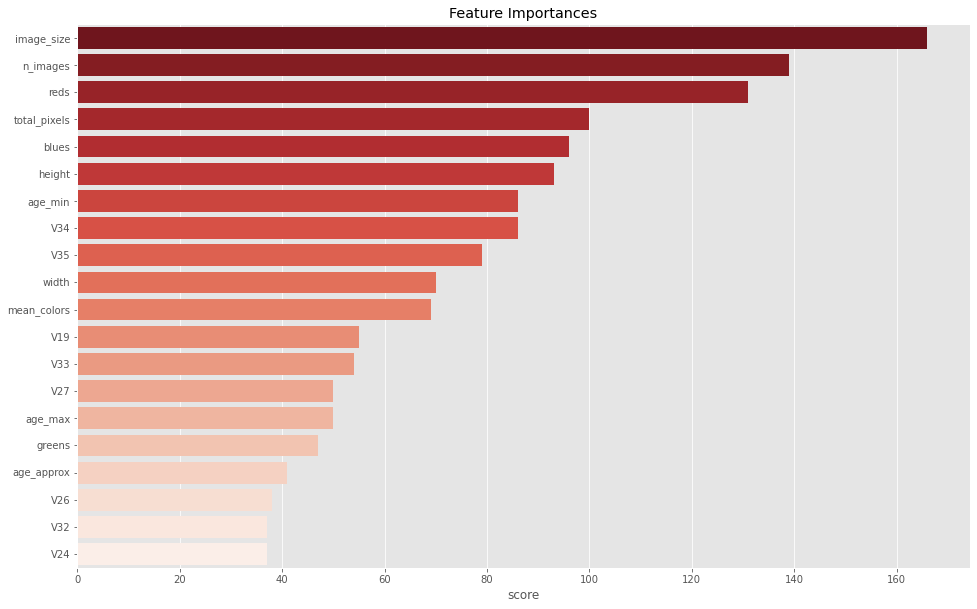

In [41]:

feature_importance = xg.get_booster().get_score(importance_type='weight')

keys = list(feature_importance.keys())
values = list(feature_importance.values())

importance = pd.DataFrame(data=values, index=keys,
                          columns=['score']).sort_values(by='score',
                                                         ascending=False)
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x=importance.score.iloc[:20],
            y=importance.index[:20],
            orient='h',
            palette='Reds_r')
ax.set_title('Feature Importances')
plt.show()

In [42]:
# Exclude feature from image for data for ensemble model

x_train.drop(['n_images', 'image_size','width','height','total_pixels','reds','blues','greens','mean_colors', 'age_min', 'age_max'], axis=1, inplace=True)
test.drop(['n_images', 'image_size','width','height','total_pixels','reds','blues','greens','mean_colors', 'age_min', 'age_max'], axis=1, inplace=True)

In [43]:
# Retraining
xg= xgb.XGBClassifier(
    n_estimators=750,
    learning_rate=0.015,
    min_child_weight= 218,
    max_delta_step= 4,
    max_depth= 2,
    subsample= 0.751,
    colsample_bytree= 0.77,
    gamma= 24,
    reg_lambda= 11,
    random_state=809,
    n_jobs=-1,
)

raw_models = model_check(x_train, y_train, [xg], cv)
display(raw_models)

,Model Name,Train roc Mean,Test roc Mean,Test Std,Time
0,XGBClassifier,0.730268,0.712448,0.038449,89.120811


In [44]:
sample = pd.read_csv(os.path.join('../input/siim-isic-melanoma-classification', 'sample_submission.csv'))
xg.fit(x_train, y_train)
predictions = xg.predict_proba(test)[:, 1]
meta_df = pd.DataFrame(columns=['image_name', 'target'])
meta_df['image_name'] = sample['image_name']
meta_df['target'] = predictions
meta_df.to_csv('meta_simplified_img_data.csv', header=True, index=False)

# Image Classification DL

In [73]:
# Reference : https://www.kaggle.com/datafan07/analysis-of-melanoma-metadata-and-effnet-ensemble

In [74]:
train

,age_approx,target,age_min,age_max,n_images,image_size,reds,greens,blues,mean_colors,...,X378,sex_female,sex_male,anatom_head/neck,anatom_lower extremity,anatom_null,anatom_oral/genital,anatom_palms/soles,anatom_torso,anatom_upper extremity
0,45.0,0,45.0,45.0,115,1840868.0,212.935898,138.914175,157.742255,169.864109,...,1.000000,0,1,1,0,0,0,0,0,0
1,45.0,0,45.0,45.0,24,1911615.0,217.292550,165.093667,130.881285,171.089167,...,1.000000,1,0,0,0,0,0,0,0,1
2,50.0,0,50.0,55.0,5,138515.0,199.941121,130.227057,145.908743,158.692307,...,1.000000,1,0,0,1,0,0,0,0,0
3,45.0,0,40.0,45.0,22,215755.0,119.690968,62.614725,58.724976,80.343556,...,1.000000,1,0,1,0,0,0,0,0,0
4,55.0,0,55.0,55.0,20,1649943.0,226.279244,173.174914,152.425131,183.959763,...,1.000000,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33121,50.0,0,45.0,50.0,36,400161.0,193.507748,169.161031,163.901824,175.523534,...,1.109375,0,1,0,0,0,0,0,1,0
33122,65.0,0,65.0,65.0,33,1013560.0,243.242977,202.212588,214.507917,219.987827,...,1.000000,0,1,0,0,0,0,0,1,0
33123,20.0,0,15.0,20.0,55,149559.0,168.912929,113.665849,96.385523,126.321434,...,1.000000,0,1,0,1,0,0,0,0,0
33124,50.0,0,35.0,50.0,29,132568.0,148.472556,105.514607,119.469004,124.485389,...,1.000000,0,1,0,1,0,0,0,0,0


In [75]:
meta_df

,image_name,target
0,ISIC_0052060,0.030099
1,ISIC_0052349,0.013094
2,ISIC_0058510,0.013896
3,ISIC_0073313,0.011002
4,ISIC_0073502,0.011002
...,...,...
10977,ISIC_9992485,0.011233
10978,ISIC_9996992,0.011473
10979,ISIC_9997917,0.015355
10980,ISIC_9998234,0.028700


In [78]:
!pip uninstall efficientnet
!pip install -U git+https://github.com/qubvel/efficientnet

  Cloning https://github.com/qubvel/efficientnet to /tmp/pip-req-build-q6jbvms1
  Running command git clone -q https://github.com/qubvel/efficientnet /tmp/pip-req-build-q6jbvms1
     |████████████████████████████████| 50 kB 811 kB/s eta 0:00:011
  Created wheel for efficientnet: filename=efficientnet-1.1.0-py3-none-any.whl size=18397 sha256=a8797648b4cd942cd4479c49a6ab059fd8179d26b846b3626ee9dbec96e3c67a
  Stored in directory: /tmp/pip-ephem-wheel-cache-4h7l9c9z/wheels/11/69/85/814d64d694c96db0eef17b718042d644a1e54f113920481920
Successfully built efficientnet
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [80]:
# Importing packages

import tensorflow as tf
import tensorflow.keras.backend as K
import efficientnet.tfkeras as efn
from kaggle_datasets import KaggleDatasets

tf.random.set_seed(809)

In [81]:
GCS_PATH = KaggleDatasets().get_gcs_path('melanoma-384x384')
filenames_train = np.array(tf.io.gfile.glob(GCS_PATH + '/train*.tfrec'))
filenames_test = np.array(tf.io.gfile.glob(GCS_PATH + '/test*.tfrec'))

In [82]:
"""TPU SETTING"""


DEVICE = 'TPU'
if DEVICE == 'TPU':
    print('connecting to TPU...')
    try:        
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        print('Running on TPU ', tpu.master())
    except ValueError:
        print('Could not connect to TPU')
        tpu = None

    if tpu:
        try:
            print('Initializing  TPU...')
            tf.config.experimental_connect_to_cluster(tpu)
            tf.tpu.experimental.initialize_tpu_system(tpu)
            strategy = tf.distribute.experimental.TPUStrategy(tpu)
            print('TPU initialized')
        except _:
            print('Failed to initialize TPU!')
    else:
        DEVICE = 'GPU'

if DEVICE != 'TPU':
    print('Using default strategy for CPU and single GPU')
    strategy = tf.distribute.get_strategy()

if DEVICE == 'GPU':
    print('Num GPUs Available: ',
          len(tf.config.experimental.list_physical_devices('GPU')))

print('REPLICAS: ', strategy.num_replicas_in_sync)
AUTO = tf.data.experimental.AUTOTUNE


connecting to TPU...
Running on TPU  grpc://10.0.0.2:8470
Initializing  TPU...
TPU initialized
REPLICAS:  8


In [83]:

cfg = dict(
           batch_size=32,
           img_size=384,
    
           lr_start=0.000005,
           lr_max=0.00000125,
           lr_min=0.000001,
           lr_rampup=5,
           lr_sustain=0,
           lr_decay=0.8,
           epochs=12,
    
           transform_prob=1.0,
           rot=180.0,
           shr=2.0,
           hzoom=8.0,
           wzoom=8.0,
           hshift=8.0,
           wshift=8.0,
    
           optimizer='adam',
           label_smooth_fac=0.05,
           tta_steps=20
            
        )

In [84]:
def get_mat(rotation, shear, height_zoom, width_zoom, height_shift,
            width_shift):
    
    ''' Settings for image preparations '''

    # CONVERT DEGREES TO RADIANS
    rotation = math.pi * rotation / 180.
    shear = math.pi * shear / 180.

    # ROTATION MATRIX
    c1 = tf.math.cos(rotation)
    s1 = tf.math.sin(rotation)
    one = tf.constant([1], dtype='float32')
    zero = tf.constant([0], dtype='float32')
    rotation_matrix = tf.reshape(
        tf.concat([c1, s1, zero, -s1, c1, zero, zero, zero, one], axis=0),
        [3, 3])

    # SHEAR MATRIX
    c2 = tf.math.cos(shear)
    s2 = tf.math.sin(shear)
    shear_matrix = tf.reshape(
        tf.concat([one, s2, zero, zero, c2, zero, zero, zero, one], axis=0),
        [3, 3])

    # ZOOM MATRIX
    zoom_matrix = tf.reshape(
        tf.concat([
            one / height_zoom, zero, zero, zero, one / width_zoom, zero, zero,
            zero, one
        ],
                  axis=0), [3, 3])

    # SHIFT MATRIX
    shift_matrix = tf.reshape(
        tf.concat(
            [one, zero, height_shift, zero, one, width_shift, zero, zero, one],
            axis=0), [3, 3])

    return K.dot(K.dot(rotation_matrix, shear_matrix),
                 K.dot(zoom_matrix, shift_matrix))


def transform(image, cfg):
    
    ''' This function takes input images of [: , :, 3] sizes and returns them as randomly rotated, sheared, shifted and zoomed. '''

    DIM = cfg['img_size']
    XDIM = DIM % 2  # fix for size 331

    rot = cfg['rot'] * tf.random.normal([1], dtype='float32')
    shr = cfg['shr'] * tf.random.normal([1], dtype='float32')
    h_zoom = 1.0 + tf.random.normal([1], dtype='float32') / cfg['hzoom']
    w_zoom = 1.0 + tf.random.normal([1], dtype='float32') / cfg['wzoom']
    h_shift = cfg['hshift'] * tf.random.normal([1], dtype='float32')
    w_shift = cfg['wshift'] * tf.random.normal([1], dtype='float32')

    # GET TRANSFORMATION MATRIX
    m = get_mat(rot, shr, h_zoom, w_zoom, h_shift, w_shift)

    # LIST DESTINATION PIXEL INDICES
    x = tf.repeat(tf.range(DIM // 2, -DIM // 2, -1), DIM)
    y = tf.tile(tf.range(-DIM // 2, DIM // 2), [DIM])
    z = tf.ones([DIM * DIM], dtype='int32')
    idx = tf.stack([x, y, z])

    # ROTATE DESTINATION PIXELS ONTO ORIGIN PIXELS
    idx2 = K.dot(m, tf.cast(idx, dtype='float32'))
    idx2 = K.cast(idx2, dtype='int32')
    idx2 = K.clip(idx2, -DIM // 2 + XDIM + 1, DIM // 2)

    # FIND ORIGIN PIXEL VALUES
    idx3 = tf.stack([DIM // 2 - idx2[0, ], DIM // 2 - 1 + idx2[1, ]])
    d = tf.gather_nd(image, tf.transpose(idx3))

    return tf.reshape(d, [DIM, DIM, 3])

def prepare_image(img, cfg=None, augment=True):
    
    ''' This function loads the image, resizes it, casts a tensor to a new type float32 in our case, transforms it using the function just above, then applies the augmentations.'''
    
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [cfg['img_size'], cfg['img_size']],
                          antialias=True)
    img = tf.cast(img, tf.float32) / 255.0

    if augment:
        if cfg['transform_prob'] > tf.random.uniform([1], minval=0, maxval=1):
            img = transform(img, cfg)

        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_saturation(img, 0.7, 1.3)
        img = tf.image.random_contrast(img, 0.8, 1.2)
        img = tf.image.random_brightness(img, 0.1)

    return img

In [85]:
def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'image_name': tf.io.FixedLenFeature([], tf.string),
        'patient_id': tf.io.FixedLenFeature([], tf.int64),
        'sex': tf.io.FixedLenFeature([], tf.int64),
        'age_approx': tf.io.FixedLenFeature([], tf.int64),
        'anatom_site_general_challenge': tf.io.FixedLenFeature([], tf.int64),
        'diagnosis': tf.io.FixedLenFeature([], tf.int64),
        'target': tf.io.FixedLenFeature([], tf.int64),
        #'width': tf.io.FixedLenFeature([], tf.int64),
        #'height': tf.io.FixedLenFeature([], tf.int64)
    }

    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    return example['image'], example['target']


def read_unlabeled_tfrecord(example):
    UNLABELED_TFREC_FORMAT = {
        'image': tf.io.FixedLenFeature([], tf.string),
        'image_name': tf.io.FixedLenFeature([], tf.string),
        'patient_id': tf.io.FixedLenFeature([], tf.int64),
        'sex': tf.io.FixedLenFeature([], tf.int64),
        'age_approx': tf.io.FixedLenFeature([], tf.int64),
        'anatom_site_general_challenge': tf.io.FixedLenFeature([], tf.int64),
    }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    return example['image'], example['image_name']

def count_data_items(filenames):
    n = [
        int(re.compile(r'-([0-9]*)\.').search(filename).group(1))
        for filename in filenames
    ]
    return np.sum(n)

In [86]:
def getTrainDataset(files, cfg, augment=True, shuffle=True):
    
    ''' This function reads the tfrecord train images, shuffles them, apply augmentations to them and prepares the data for training. '''
    
    ds = tf.data.TFRecordDataset(files, num_parallel_reads=AUTO)
    ds = ds.cache()

    if shuffle:
        opt = tf.data.Options()
        opt.experimental_deterministic = False
        ds = ds.with_options(opt)

    ds = ds.map(read_labeled_tfrecord, num_parallel_calls=AUTO)
    ds = ds.repeat()
    if shuffle:
        ds = ds.shuffle(2048)
    ds = ds.map(lambda img, label:
                (prepare_image(img, augment=augment, cfg=cfg), label),
                num_parallel_calls=AUTO)
    ds = ds.batch(cfg['batch_size'] * strategy.num_replicas_in_sync)
    ds = ds.prefetch(AUTO)
    return ds

def getTestDataset(files, cfg, augment=False, repeat=False):
    
    ''' This function reads the tfrecord test images and prepares the data for predicting. '''
    
    ds = tf.data.TFRecordDataset(files, num_parallel_reads=AUTO)
    ds = ds.cache()
    if repeat:
        ds = ds.repeat()
    ds = ds.map(read_unlabeled_tfrecord, num_parallel_calls=AUTO)
    ds = ds.map(lambda img, idnum:
                (prepare_image(img, augment=augment, cfg=cfg), idnum),
                num_parallel_calls=AUTO)
    ds = ds.batch(cfg['batch_size'] * strategy.num_replicas_in_sync)
    ds = ds.prefetch(AUTO)
    return ds

def get_model():
    
    ''' This function gets the layers inclunding efficientnet ones. '''
    
    model_input = tf.keras.Input(shape=(cfg['img_size'], cfg['img_size'], 3),
                                 name='img_input')

    dummy = tf.keras.layers.Lambda(lambda x: x)(model_input)

    outputs = []

    x = efn.EfficientNetB3(include_top=False,
                           weights='noisy-student',
                           input_shape=(cfg['img_size'], cfg['img_size'], 3),
                           pooling='avg')(dummy)
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    outputs.append(x)

    x = efn.EfficientNetB4(include_top=False,
                           weights='noisy-student',
                           input_shape=(cfg['img_size'], cfg['img_size'], 3),
                           pooling='avg')(dummy)
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    outputs.append(x)

    x = efn.EfficientNetB5(include_top=False,
                           weights='noisy-student',
                           input_shape=(cfg['img_size'], cfg['img_size'], 3),
                           pooling='avg')(dummy)
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    outputs.append(x)

    model = tf.keras.Model(model_input, outputs, name='aNetwork')
    model.summary()
    return model

In [87]:
def compileNewModel(cfg):
    
    ''' Configuring the model with losses and metrics. '''    
    
    with strategy.scope():
        model = get_model()

    with strategy.scope():
        model.compile(optimizer=cfg['optimizer'],
                      loss=[
                          tf.keras.losses.BinaryCrossentropy(
                              label_smoothing=cfg['label_smooth_fac']),
                          tf.keras.losses.BinaryCrossentropy(
                              label_smoothing=cfg['label_smooth_fac']),
                          tf.keras.losses.BinaryCrossentropy(
                              label_smoothing=cfg['label_smooth_fac'])
                      ],
                      metrics=[tf.keras.metrics.AUC(name='auc')])
    return model

def getLearnRateCallback(cfg):
    
    ''' Using callbacks for learning rate adjustments. '''
    
    lr_start = cfg['lr_start']
    lr_max = cfg['lr_max'] * strategy.num_replicas_in_sync * cfg['batch_size']
    lr_min = cfg['lr_min']
    lr_rampup = cfg['lr_rampup']
    lr_sustain = cfg['lr_sustain']
    lr_decay = cfg['lr_decay']

    def lrfn(epoch):
        if epoch < lr_rampup:
            lr = (lr_max - lr_start) / lr_rampup * epoch + lr_start
        elif epoch < lr_rampup + lr_sustain:
            lr = lr_max
        else:
            lr = (lr_max - lr_min) * lr_decay**(epoch - lr_rampup -
                                                lr_sustain) + lr_min
        return lr

    lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=False)
    return lr_callback

def learnModel(model, ds_train, stepsTrain, cfg, ds_val=None, stepsVal=0):
    
    ''' Fitting things together for training '''
    
    callbacks = [getLearnRateCallback(cfg)]

    history = model.fit(ds_train,
                        validation_data=ds_val,
                        verbose=1,
                        steps_per_epoch=stepsTrain,
                        validation_steps=stepsVal,
                        epochs=cfg['epochs'],
                        callbacks=callbacks)

    return history

In [91]:
import math
import re

In [92]:
ds_train = getTrainDataset(
    filenames_train, cfg).map(lambda img, label: (img, (label, label, label)))
stepsTrain = count_data_items(filenames_train) / \
    (cfg['batch_size'] * strategy.num_replicas_in_sync)

# compiling and training model

model = compileNewModel(cfg)
learnModel(model, ds_train, stepsTrain, cfg)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to identify source code of lambda function <function <lambda> at 0x7f5f584e3b00>. It was defined on this line: filenames_train, cfg, which must contain a single lambda with matching signature. To avoid ambiguity, define each lambda in a separate expression.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
115261440/115255328 [==============================] - 15s 0us/step
Model: "aNetwork"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_input (InputLayer)          [(None, 384, 384, 3) 0                                            
___________________________________________________________________________________________

In [95]:
from tqdm import tqdm
steps = count_data_items(filenames_test) / \
    (cfg['batch_size'] * strategy.num_replicas_in_sync)

z = np.zeros((cfg['batch_size'] * strategy.num_replicas_in_sync))

# loading test data

ds_testAug = getTestDataset(
    filenames_test, cfg, augment=True,
    repeat=True).map(lambda img, label: (img, (z, z, z)))

# test time augmentations for predictions (20 in our case, you can increase it a little in cfg) and taking mean of them

probs = model.predict(ds_testAug, verbose=1, steps=steps * cfg['tta_steps'])
probs = np.stack(probs)
probs = probs[:, :count_data_items(filenames_test) * cfg['tta_steps']]
probs = np.stack(np.split(probs, cfg['tta_steps'], axis=1), axis=1)
probs = np.mean(probs, axis=1)

test = pd.read_csv(os.path.join('../input/siim-isic-melanoma-classification', 'test.csv'))

y_test_sorted = np.zeros((3, probs.shape[1]))
test = test.reset_index()
test = test.set_index('image_name')

i = 0
ds_test = getTestDataset(filenames_test, cfg)
for img, imgid in tqdm(iter(ds_test.unbatch())):
    imgid = imgid.numpy().decode('utf-8')
    y_test_sorted[:, test.loc[imgid]['index']] = probs[:, i, 0]
    i += 1

    
# creating .csv files for each effnet
    
for i in range(y_test_sorted.shape[0]):
    submission = sample
    submission['target'] = y_test_sorted[i]
    submission.to_csv('submission_model_%s.csv' % i, index=False)

# blending effnets into a single .csv file    

submission = sample
submission['target'] = np.mean(y_test_sorted, axis=0)
submission.to_csv('blended_effnets.csv', index=False)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to identify source code of lambda function <function <lambda> at 0x7f5eaac9fa70>. It was defined on this line: repeat=True, which must contain a single lambda with matching signature. To avoid ambiguity, define each lambda in a separate expression.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
858/857 [==============================] - 300s 349ms/step


10982it [00:28, 384.10it/s]


In [96]:
effnet = pd.read_csv('./blended_effnets.csv')
meta = pd.read_csv('./meta_simplified_img_data.csv')


sample['target'] = (
                           
                           effnet['target'] * 0.9 +
                           meta['target'] * 0.1 
                          
                          )

# final submissions

sample.to_csv('ensembled.csv', header=True, index=False)

In [97]:
pd.read_csv('./ensembled.csv')

SyntaxError: invalid syntax (<ipython-input-97-d419720aeaa3>, line 1)